# Data Analysis and Visualisation on IPL (2008-2019)

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities or states in India The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season. The venue for the 2020 season has been moved, due to the ongoing COVID-19 pandemic; games are now taking place in the United Arab Emirates from 19 September through 10 November 2020.


# Getting the  Dataset

**For this analysis I have selected the IPL Data till season11(2008-2019) from kaggle.
you can check out and download this dataset at "https://www.kaggle.com/nowke9/ipldata"**

There are several options for getting the dataset into Jupyter:

Download the CSV manually and upload it via Jupyter's GUI
Use the urlretrieve function from the urllib.request to download CSV files from a raw URL directly
Use a helper library e.g. opendatasets, which contains a collection of curated datasets and provides a function for directly download.
We'll use the opendatasets helper library to download the files.

# Downloading the Dataset

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/nowke9/ipldata' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

The dataset has been downloaded and extracted.

In [ ]:
# Changing the directory
data_dir = './ipldata'

In [ ]:
import os
os.listdir(data_dir)

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "IPL-Data-Analysis" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

In this section we will first load the downloaded dataset in data frame using pandas. Then we will read these datasets using
**read_csv** function. We will explore our data through various columns and rows and find some **missing or null values** in our data and will clean or replace the irrelevant data wherever necessary.



In [1]:
import pandas as pd

In [2]:
ipl_matches_df=pd.read_csv('ipldata/matches.csv')

In [3]:
ipl_matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
ipl_deliveries_df=pd.read_csv('ipldata/deliveries.csv')

In [5]:
ipl_deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# Data Preparation and Cleaning for Matches dataframe 

In [6]:
#checking no of rows and columns in dataframe.
ipl_matches_df.shape

(756, 18)

In [7]:
#checking all columns in dataframe
ipl_matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
#Getting information about ipl matches dataframe
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

From above we can observe that the **Non-Null Count** for **City** is **749** though the total venue are  **756** that means there are some missing values in City.
Similarly, we can observe there are some missing values in **winner , player_of_match, umpire1, umpire2, umpire3.**

In [9]:
#checking no of null values in each column
ipl_matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

From above output we can easily observe that there are **7 null values in City column , 4 null values in winner column and 4 null values in player_of_match column.**
Note it is clear that  **null values for 'winner' column and 'player_of_match'** are only cases when there is **'No result'** of the match  so we can assume that match might be **'Cancelled' or 'Draw'  due to 'weather or some other issues'.**

Now we do not require the *umpire1, umpire2 and umpire3* columns in our data frame so we will delete these columns by using drop() function.

In [10]:
#Deleting the umpire1,umpire2,umpire3 columns from dataframe.
ipl_matches_df= ipl_matches_df.drop(columns=['umpire1','umpire2','umpire3'])

In [11]:
#displaying new dataframe
ipl_matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [12]:
#checking all null values in city column
ipl_matches_df[ipl_matches_df.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In the above data, you can see all null values for City column but the venue for these matches is **Dubai International Cricket Stadium** so we replace these null values with **'Dubai'** City.

In [13]:
#changing the null values 
ipl_matches_df.loc[[461,462,466,468,469,474,476],'city']='Dubai'

Now lets check once again that there is any null value in city column or not.

In [15]:
#checking any null value in city column
ipl_matches_df.city.isna().sum()

0

***Great!! no null values in City column we replaced all null values.***

In [16]:
ipl_matches_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

Note here that there multiple name for same city that is **'Bangalore','Bangaluru'** so lets change this.

In [18]:
#cleaning data having multiple city names
ipl_matches_df.city.replace({'Bangalore':'Bengaluru'},inplace=True)

In [19]:
ipl_matches_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

***Great!!now we have cleaned our city column data. Now lets check data for team1 and team2 column.***

In [20]:
ipl_matches_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
ipl_matches_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

From above it can be observed that there are multiple names for same team  **'Rising Pune Supergiant', 'Rising Pune Supergiants',
'Delhi Daredevils','Delhi Capitals'** therefor data cleaning is required for this error.

In [23]:
#clenaing data by changing multiple team names
ipl_matches_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_matches_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_matches_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [24]:
ipl_matches_df.team1.unique()
ipl_matches_df.team2.unique()


array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

***Great!! now we have cleaned our data.***

# Data Preparation and Cleaning for Deliveries Dataframe

In [25]:
#checking no of rows and columns in dataframe.
ipl_deliveries_df.shape

(179078, 21)

In [26]:
#Getting information about ipl matches dataframe
ipl_deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [27]:
#checking no of null values in each column
ipl_deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

From above we can observe that there are null values only in **player_dismissed,dismissal_kind and fielder** column so we need to clean this data also, we don't require these columns so we will delete these columns from our datframe using **drop()** function.

In [28]:
ipl_deliveries_df= ipl_deliveries_df.drop(columns=['player_dismissed','dismissal_kind','fielder'])

In [29]:
ipl_deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2


In [30]:
#checking null values in ipl-deliveries_df dataframe
ipl_deliveries_df.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [31]:
ipl_deliveries_df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [32]:
ipl_deliveries_df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

From above it can be observed that there are multiple names for same team **'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Delhi Daredevils','Delhi Capitals'** therefor data cleaning is required for this error as we have done earlier in our matches dataframe

In [33]:
#clenaing data by changing multiple team names
ipl_deliveries_df.batting_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_deliveries_df.bowling_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)

In [34]:
ipl_deliveries_df.batting_team.unique()
ipl_deliveries_df.bowling_team.unique()


array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

Great!! Now we have cleaned our dataframes.

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mohdadnansaifi2001/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mohdadnansaifi2001/ipl-data-analysis


'https://jovian.ml/mohdadnansaifi2001/ipl-data-analysis'

## Exploratory Analysis and Visualization

**Now  as we have cleaned our dataframes we can easily visualise them through plots,barplots,scattterplots and charts by using the matplotlib and seaborn libraries.
To use these libraries we have to import them first.**

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### No of Matches Played in Each City ###

We can visualize ***No of matches played in each city*** through barplot. First we need to count matches played in each city with the help of ***count()*** function but before that lets explore our city column with ***unique()*** function.

In [38]:
ipl_matches_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [39]:
matches_in_city=ipl_matches_df.groupby('city')[['id']].count()

In [40]:
matches_in_city=matches_in_city.sort_values('id',ascending=True).reset_index()

In [41]:
matches_in_city=matches_in_city.rename(columns={'id':'matches'})
matches_in_city

,city,matches
0,Bloemfontein,2
1,Nagpur,3
2,Kimberley,3
3,East London,3
4,Kanpur,4
5,Kochi,5
6,Raipur,6
7,Sharjah,6
8,Abu Dhabi,7
9,Ranchi,7


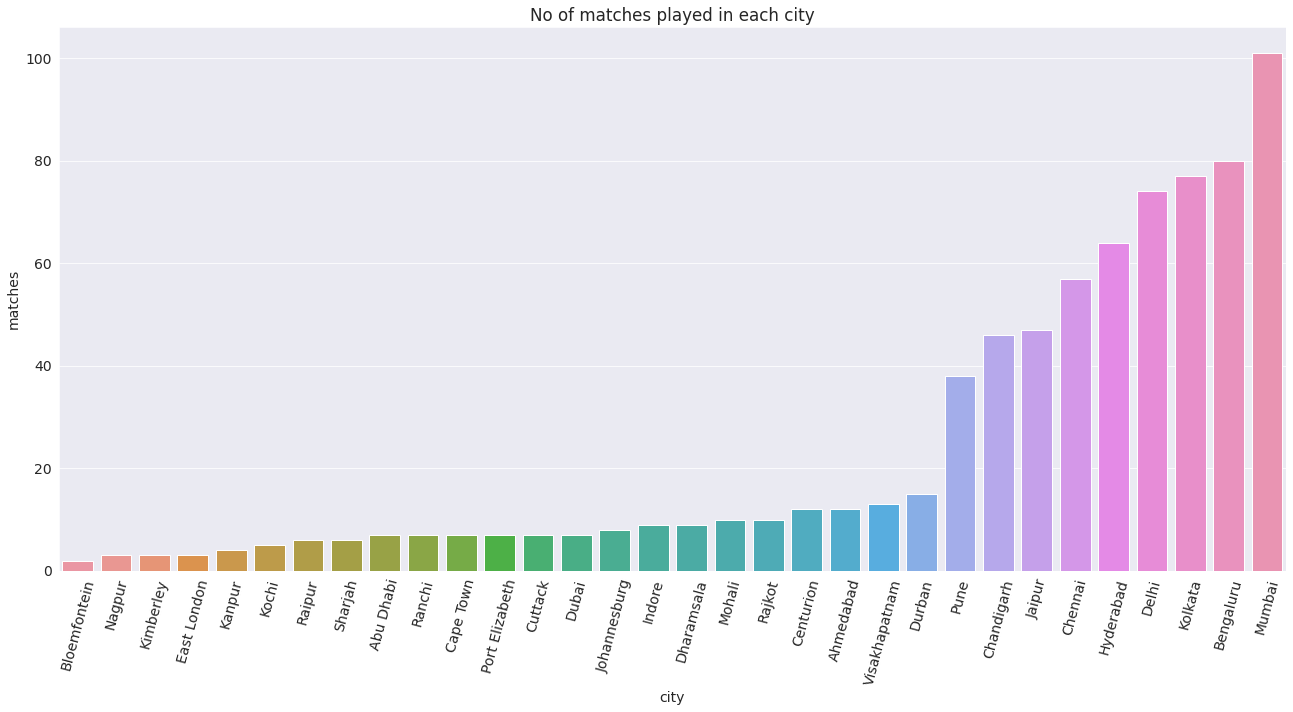

In [42]:
plt.figure(figsize=(22,10))
plt.title('No of matches played in each city')
plt.xlabel('Cities')
plt.ylabel('No of Matches Played')
plt.xticks(rotation=75)
sns.barplot(x='city',y='matches',data=matches_in_city);

### Matches Played In Each Season ###

To visualise Matches Played in Each Season First we need to group all ***season**and **no of matches played*** in new dataframe ***matches_in_season***. We can do this by using ***groupby(), count(), sort_values() and rename()functions.***

In [43]:
matches_in_season=ipl_matches_df.groupby('season')[['id']].count()

In [44]:
matches_in_season=matches_in_season.sort_values('season',ascending=True).reset_index()

In [45]:
matches_in_season.rename(columns={'id':'no_of_matches'},inplace = True)

In [46]:
matches_in_season

,season,no_of_matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


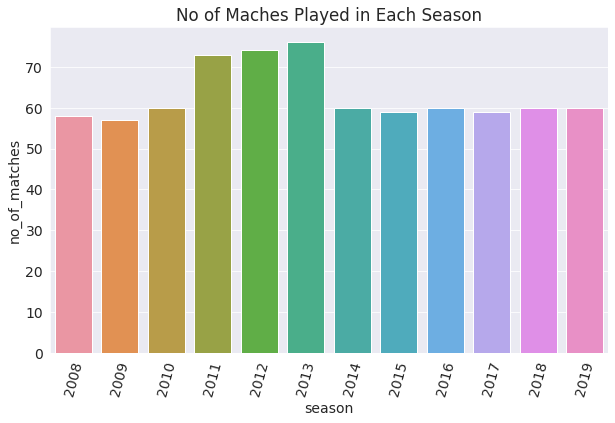

In [47]:
plt.figure(figsize=(10,6))
plt.title('No of Maches Played in Each Season')
plt.xlabel('Seasons')
plt.ylabel('No of Matches Played')
plt.xticks(rotation=75)
sns.barplot(x='season',y='no_of_matches', data= matches_in_season);

### No of Matches Won by Each Team ### 

In [48]:
matches_won=ipl_matches_df.groupby('winner')[['id']].count()

In [49]:
matches_won=matches_won.sort_values('id',ascending=False).reset_index()

In [50]:
matches_won.rename(columns={'winner':'team','id':'matches_won'},inplace=True)

In [51]:
matches_won

,team,matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


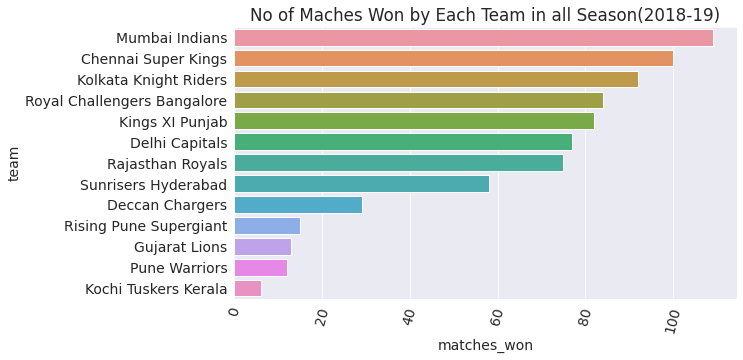

In [52]:
plt.title('No of Maches Won by Each Team in all Season(2018-19)')
plt.xlabel('Teams')
plt.ylabel('No of Matches Won')
plt.xticks(rotation=75)
sns.barplot(x='matches_won',y='team', data= matches_won);

### No Of Matches Played Vs No of Matches Won

To visualise No of Matches Played Vs No of Maches Won we firt need to count the ***total matches played by each team** and then ***total matches won by them*** we can explore this by loading this data into new dataframe **teams_df** but before this we need to first count the total teams from  our  **ipl_matches_df** dataframe.

In [53]:
total_teams=pd.concat([ipl_matches_df['team1'],ipl_matches_df['team2']])

In [54]:
teams_df=total_teams.value_counts().reset_index()

In [55]:
teams_df.columns=['team','total_matches']   #Make two Columns Teams and Total Matches
teams_df.set_index('team',inplace=True)     #Sets Team as index


In [56]:
teams_df=teams_df.merge(matches_won,on='team')
teams_df

,team,total_matches,matches_won
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,84
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,77
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,100
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58
8,Rising Pune Supergiant,76,15
9,Deccan Chargers,75,29


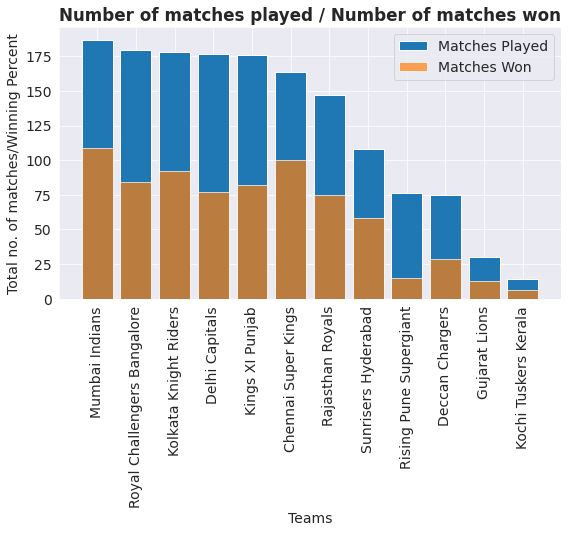

In [57]:
plt.title('Number of matches played / Number of matches won',fontweight=800)
plt.xlabel('Teams')
plt.xticks(rotation=75)
plt.ylabel('Total no. of matches/Winning Percent')
plt.xticks(rotation=90)
plt.bar(teams_df.team,teams_df.total_matches,alpha=1)
plt.bar(teams_df.team,teams_df.matches_won, alpha=0.7)
plt.legend(['Matches Played','Matches Won']);

### Total Teams that scores Runs >200

In [58]:
high_scores = ipl_deliveries_df.groupby(['match_id', 'inning','batting_team','bowling_team',])['total_runs'].sum().reset_index()
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Rising Pune Supergiant,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


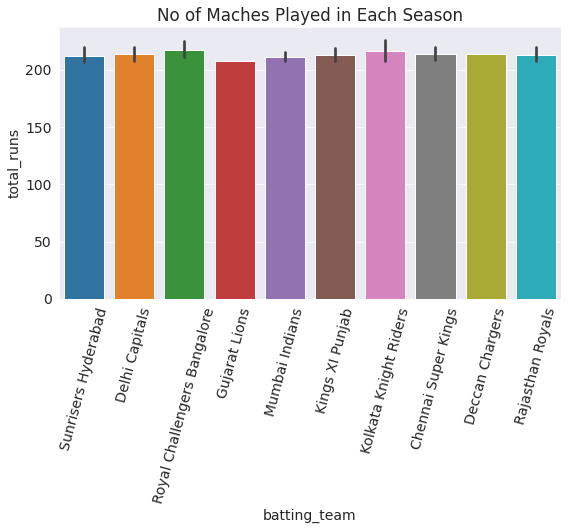

In [59]:

plt.title('No of Maches Played in Each Season')
plt.xlabel('Batting_team')
plt.ylabel('Total Runs')
plt.xticks(rotation=75)
sns.barplot(x='batting_team',y='total_runs', data= high_scores);

Let us save and upload our work to Jovian before continuing

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mohdadnansaifi2001/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mohdadnansaifi2001/ipl-data-analysis


'https://jovian.ml/mohdadnansaifi2001/ipl-data-analysis'

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.



**Q1: How many matches are there where toss winning team is the winner?**

In [62]:
toss_win= ipl_matches_df[ipl_matches_df['toss_winner'] == ipl_matches_df['winner']]
toss_win

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [63]:
toss_win=toss_win[toss_win.result != 'tie']
print('There are {} matches played  in the IPL till now where toss winner is the winner of the match'.format(toss_win.id.count()))

There are 350 matches played  in the IPL till now where toss winner is the winner of the match


#### Q2:Who is the Man of Match In most of the times?

In [64]:
man_of_match =ipl_matches_df.groupby('player_of_match')[['id']].count()
man_of_match = man_of_match.sort_values('id',ascending=False).head(15).reset_index()

In [65]:
man_of_match.rename(columns={'id':'no_of_matches_won'},inplace=True)

In [66]:
man_of_match

,player_of_match,no_of_matches_won
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


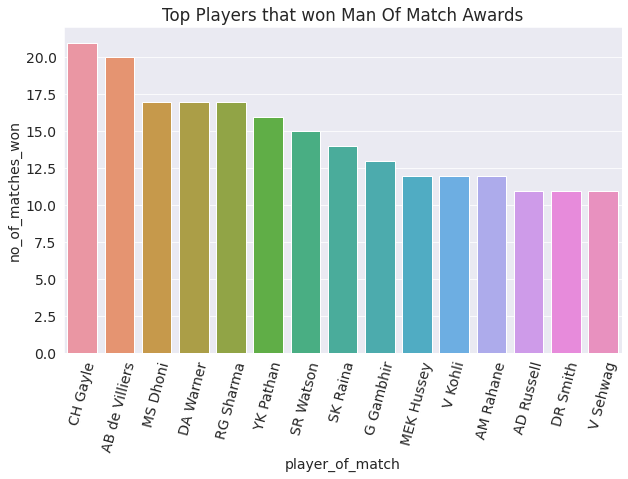

In [67]:
plt.figure(figsize=(10,6))
plt.title('Top Players that won Man Of Match Awards')
plt.xlabel('Player Names')
plt.ylabel('No of Awards')
plt.xticks(rotation=75)
sns.barplot(x='player_of_match',y='no_of_matches_won', data= man_of_match);

#### Q3: How many teams win by 10 wickets?

In [68]:
win_10_wickets = ipl_matches_df[ipl_matches_df.win_by_wickets != 0]
win_10_wickets=win_10_wickets.groupby(['city','team1','team2','winner','win_by_wickets'])['id'].unique().reset_index()

In [69]:
win_10_wickets=win_10_wickets[win_10_wickets['win_by_wickets']==10]
print('There are {} total teams in the IPL till now who win by 10 wickets '.format(win_10_wickets.win_by_wickets.count()))

There are 11 total teams in the IPL till now who win by 10 wickets 


In [70]:
win_10_wickets

,city,team1,team2,winner,win_by_wickets,id
21,Bengaluru,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,[184]
47,Cape Town,Kings XI Punjab,Delhi Capitals,Delhi Capitals,10,[120]
62,Chandigarh,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,10,[35]
64,Chandigarh,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10,[391]
122,Delhi,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,[543]
186,Indore,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,10,[7941]
211,Jaipur,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10,[377]
301,Mumbai,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,[72]
308,Mumbai,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,[299]
357,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10,[3]


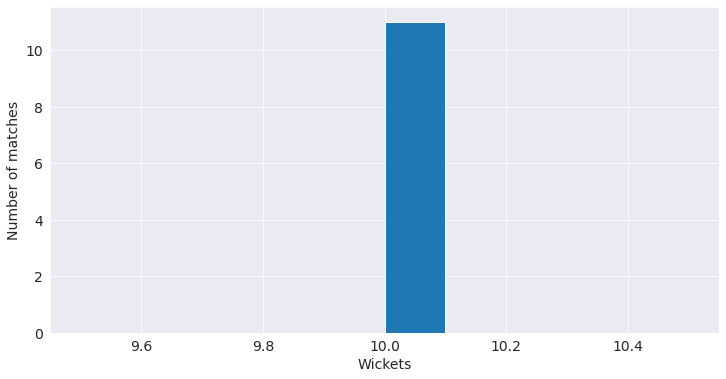

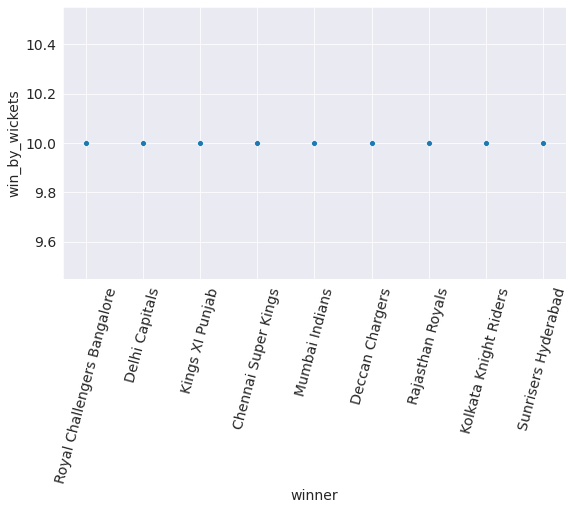

In [71]:
plt.figure(figsize=(12,6))
plt.hist(win_10_wickets['win_by_wickets'])
plt.xlabel('Wickets')
plt.ylabel('Number of matches')
plt.show()
plt.xticks(rotation=75)
sns.scatterplot(x='winner',y='win_by_wickets',data=win_10_wickets);

#### Q4: How many teams win by runs greater than 140?

In [72]:
runs_140 = ipl_matches_df[ipl_matches_df.win_by_runs != 0]
runs_140=runs_140.groupby(['city','team1','team2','winner','win_by_runs'])['id'].unique().reset_index()

In [73]:
runs_140=runs_140[runs_140['win_by_runs']>100]
print('There are {} total teams in the IPL till now who win by runs greater than 140 '.format(runs_140.win_by_runs.count()))

There are 9 total teams in the IPL till now who win by runs greater than 140 


In [74]:
runs_140

,city,team1,team2,winner,win_by_runs,id
16,Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140,[60]
30,Bengaluru,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144,[620]
34,Bengaluru,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138,[557]
38,Bengaluru,Royal Challengers Bangalore,Rising Pune Supergiant,Royal Challengers Bangalore,130,[411]
135,Delhi,Mumbai Indians,Delhi Capitals,Mumbai Indians,146,[44]
146,Dharamsala,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,111,[296]
187,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,118,[11147]
239,Kolkata,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,102,[7934]
286,Mumbai,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,105,[115]


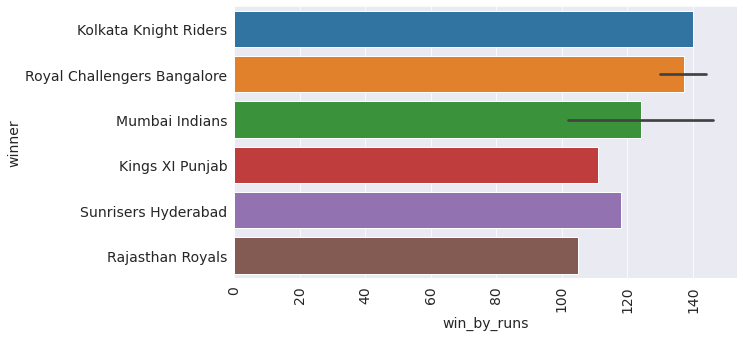

In [75]:
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
sns.barplot(y='winner',x='win_by_runs',data=runs_140);

#### Q5: Which team wins IPL season most of the time?

In [76]:
#Creating a dataframe of final matches
final_match_df = ipl_matches_df.groupby('season').tail(1).sort_values('season').reset_index()
final_match_df

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
1,173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
2,233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
3,306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
4,380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
5,456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
6,516,517,2014,Bengaluru,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
7,575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
8,635,636,2016,Bengaluru,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
9,58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [77]:
final_match_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

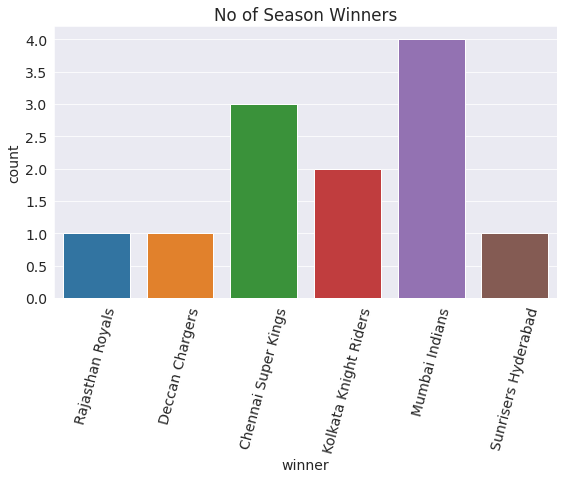

In [78]:
plt.title('No of Season Winners')
plt.xticks(rotation=75)
sns.countplot(x=final_match_df['winner']);

Let us save and upload our work to Jovian before continuing.

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mohdadnansaifi2001/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mohdadnansaifi2001/ipl-data-analysis


'https://jovian.ml/mohdadnansaifi2001/ipl-data-analysis'

## Inferences and Conclusion

We've drawn many interesting inferences from the survey, here's a summary of the few of them:
* Most no of matches are played in the Mumbai City in IPL till now.
* There are 350 matches played  in the IPL till now where toss winner is the winner of the match.
* Mumbai Indians wins most of the matches out of total matches plyaed in comparison with other teams , Out of 187 matches   Mumbai  Indians win 109 matches.
* CH Gayle has been awarded highest Man Of the Match in IPL till now, He has been awarded 21 Man of Match award in Total.
* There are 11 total teams in the IPL till now who win by 10 wickets 
* Most no of matches are played in 2013


In [81]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

This Project is a part of the Course DATA SCIENCE WITH PYTHON (ZERO_TO_PANDAS), I would like to express my gratitude towards the Jovian.ml Course Team and the Instructor Aakash NS for giving me an Oppurtunity to do a project like this. To know more about the course follow the link https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

**Future Work**
* We can add the dataset of 2020 IPL(after it ends), observe and compare how the performance of players and teams changes.

* We can find out whether taking decesion to bat/field was beneficial or not for the team.

* We can calculate the strike rate for different players.

IPL 2008-2019 Dataset: https://www.kaggle.com/nowke9/ipldata

Kaggle Datasets (Choose Dataset of your choice): https://www.kaggle.com/datasetsNumpy 

Documentation: https://numpy.org/devdocs/user/quickstart.html

User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

Data Visualization Cheat Sheet: https://jovian.ml/aakashns/dataviz-cheatsheet

opendatasets Python library: https://github.com/JovianML/opendatasets

In [ ]:
import jovian

In [ ]:
jovian.commit()